In [1039]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
import time
from pytesseract import image_to_data, Output
import glob, os
from scipy import ndimage


In [993]:
thermostat_photos_dir = "/home/aleks/Documents/my_documents/home/Aachen/Utilities/app/static/uploads/devices/Kar39EGThermostat/photos/"
os.chdir(thermostat_photos_dir)
thermostat_photos_filepaths = [thermostat_photos_dir + file for file in glob.glob("*.jpg")]
 

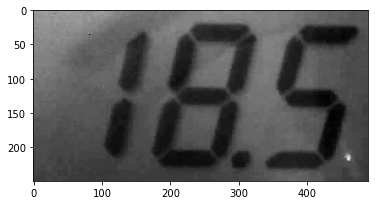

In [1058]:
path = thermostat_photos_filepaths[70]

im = cv2.imread(path, cv2.IMREAD_COLOR)
im = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
im = ndimage.rotate(im, 1)
im = img = image = im[440:690, 120:610, :]
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.imshow(im_gray, cmap='gray')

In [1049]:
# # The initial processing of the image
# # image = cv2.medianBlur(image, 3)
# image_bw = im_gray
 
# # The declaration of CLAHE
# # clipLimit -> Threshold for contrast limiting
# clahe = cv2.createCLAHE(clipLimit=20, tileGridSize=(8, 8))
# final_img = clahe.apply(image_bw)

# # Showing all the three images
# # cv2.imshow("ordinary threshold", ordinary_img)
# # cv2.imshow("CLAHE image", final_img)
# plt.imshow(final_img, cmap='gray')

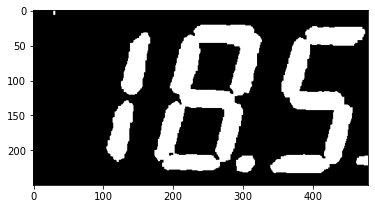

In [1050]:
kernel = np.ones((35,35),np.uint8)
im_inverse_gray = 255 - im_gray
morphed_im = cv2.morphologyEx(im_inverse_gray, cv2.MORPH_TOPHAT, kernel)
_, negative_img = cv2.threshold(morphed_im, 10, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
negative_img = cv2.morphologyEx(negative_img, cv2.MORPH_OPEN, kernel)
negative_img = cv2.morphologyEx(negative_img, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((5,5),np.uint8)

plt.imshow(negative_img, cmap='gray')

In [1051]:
# equ = cv2.equalizeHist(im_gray)
# plt.imshow(equ, 'gray')

In [1052]:
# The initial processing of the image
# image = cv2.medianBlur(image, 3)
# image_bw = im_gray
 
# # The declaration of CLAHE
# # clipLimit -> Threshold for contrast limiting
# clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(2, 420))
# final_img = clahe.apply(image_bw)

 
# # Ordinary thresholding the same image
# _, negative_img = cv2.threshold(final_img, 80, final_img.max(), cv2.THRESH_BINARY) #| cv2.THRESH_OTSU)
 
# # Showing all the three images
# # cv2.imshow("ordinary threshold", ordinary_img)
# # cv2.imshow("CLAHE image", final_img)
# plt.imshow(negative_img, cmap='gray')

In [1053]:
# plt.imshow(negative_img, cmap='gray')

(1, 12)


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,29,0,451,233,59,185.0


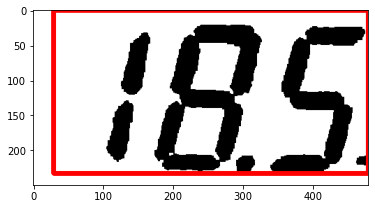

In [1054]:
#Alternatively: can be skipped if you have a Blackwhite image
# im_ocr = equ

# kernel = np.ones((2, 1), np.uint8)

ocr_im = 255 - negative_img

# kernel = np.ones((2, 1), np.uint8)
# ocr_im = cv2.erode(ocr_im, kernel, iterations=20)
# ocr_im = cv2.dilate(ocr_im, kernel, iterations=20)




custom_config = r'--oem 3 --psm 8 digits'
df = image_to_data(ocr_im, lang='eng', config=custom_config, output_type=Output.DATAFRAME)

df.dropna(inplace=True)

img = cv2.cvtColor(ocr_im, cv2.COLOR_GRAY2BGR)

print(df.shape)

for index, row in df.iterrows():
    x, y = (int(row['left']), int(row['top']))
    dx, dy= (int(row['width']), int(row['height']))
    img = cv2.rectangle(img, (x, y), (x + dx, y + dy), (255, 0, 0), 5)
    
# img = cv2.rectangle(img, (0, 0), (100, 200), (0, 0, 255), 6)
plt.imshow(img)
df

In [1094]:
def temperature_ocr(path):
    im = cv2.imread(path, cv2.IMREAD_COLOR)
    im = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
    im = ndimage.rotate(im, 1)
    im = im[440:690, 120:610, :]
  
    img = image = im
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    kernel = np.ones((35,35),np.uint8)
    im_inverse_gray = 255 - im_gray
    morphed_im = cv2.morphologyEx(im_inverse_gray, cv2.MORPH_TOPHAT, kernel)
    _, negative_img = cv2.threshold(morphed_im, 10, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3,3),np.uint8)
    negative_img = cv2.morphologyEx(negative_img, cv2.MORPH_OPEN, kernel)
    negative_img = cv2.morphologyEx(negative_img, cv2.MORPH_CLOSE, kernel)
    kernel = np.ones((5,5),np.uint8)
    
    ocr_im = 255 - negative_img
    
#     scale_percent = 60 # percent of original size
#     width = int(ocr_im.shape[1] * scale_percent / 100)
#     height = int(ocr_im.shape[0] * scale_percent / 100)
#     dim = (width, height)
    
#     ocr_im = cv2.resize(ocr_im, dim, interpolation = cv2.INTER_AREA)
    
    custom_config = r'--oem 3 --psm 8 digits'
    df = image_to_data(ocr_im, lang='eng', config=custom_config, output_type=Output.DATAFRAME)

    df.dropna(inplace=True)

    img = cv2.cvtColor(ocr_im, cv2.COLOR_GRAY2BGR)
    
    print(df.shape)

    for index, row in df.iterrows():
        x, y = (int(row['left']), int(row['top']))
        dx, dy= (int(row['width']), int(row['height']))
        img = cv2.rectangle(img, (x, y), (x + dx, y + dy), (255, 0, 0), 5)
        
    temperature = None
    if df.shape[0] == 1:
        temperature = float(df.iloc[0]["text"])
        print(temperature)
        if temperature > 50:
            temperature = temperature / 10
        
    return img, temperature



(1, 12)
145.0
14.5


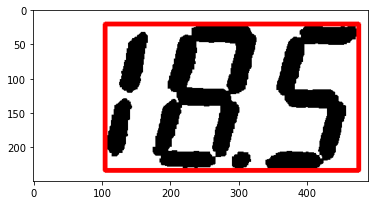

In [1096]:
img_patch, temperature = temperature_ocr(thermostat_photos_filepaths[6])

plt.imshow(img_patch)
print(temperature)